# EDA (Exploratory Data Analysis)

### 사용 데이터 
   **보스턴 집값 데이터** : https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv

### 데이터 설명

[Boston Housing 1970](https://geodacenter.github.io/data-and-lab/boston-housing/) 데이터의 일부를 추출한 데이터로서,     

레코드수 : 506 개      
컬럼개수 :  17 개

| 컬럼명 | 설명|
|:-------|:------|
|TOWN | 소속 도시 이름|
|LON  | 해당 지역의 경도(Longitudes) 정보| 
|LAT  | 해당 지역의 위도(Latitudes) 정보|
| **CMEDV**| **해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)**|
| CRIM | 지역 범죄율 (per capita crime)|
| ZN   | 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율|
| INDUS | 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적|
| CHAS | 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)|
| NOX | 소속 도시의 산화질소 농도|
| RM | 해당 지역의 자택당 평균 방 갯수|
| AGE | 해당 지역에 1940년 이전에 건설된 주택의 비율|
| DIS | 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여|
| RAD | 소속 도시가 Radial 고속도로와의 접근성 지수|
| TAX | 소속 도시의 10000달러당 재산세|
| PTRATIO | 소속 도시의 학생-교사 비율|
| B | 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율|
| LSTAT | 해당 지역의 빈곤층 비율|


## 1. 라이브러리 및 데이터 로딩

In [1]:
# 라이브러리 로딩
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv')
df.head()


,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## 2. EDA
### 2.1 데이터의 전반적인 검토(Overview)

In [3]:
# 결측치 점검 : isnull() / notnull() df.isnull().sum() 모든 컬럼에 null값이 있는지 확인 결과값 = False
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
# 데이터 자료형 확인 : TOWN을 제외한 나머지는 모두 숫자형 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [5]:
# 숫자형 변수(Numerical variable)에 대한 통계값 : describe()
df.describe() 

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# 범주형 변수(Categorical variable)의 종류 확인 : unique() set.TOWNS
towns = df.TOWN.unique() #df["TOWN"].unique()
print(f'도시의 개수 : {len(towns)}')
towns

도시의 개수 : 92


array(['Nahant', 'Swampscott', 'Marblehead', 'Salem', 'Lynn', 'Sargus',
       'Lynnfield', 'Peabody', 'Danvers', 'Middleton', 'Topsfield',
       'Hamilton', 'Wenham', 'Beverly', 'Manchester', 'North Reading',
       'Wilmington', 'Burlington', 'Woburn', 'Reading', 'Wakefield',
       'Melrose', 'Stoneham', 'Winchester', 'Medford', 'Malden',
       'Everett', 'Somerville', 'Cambridge', 'Arlington', 'Belmont',
       'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury', 'Wayland',
       'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick', 'Framingham',
       'Ashland', 'Sherborn', 'Brookline', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk', 'Walpole',
       'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton', 'Quincy',
       'Braintree', 'Randolph', 'Holbrook', 'Weymouth', 'Cohasset',
       'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell', 'Scituate',
       'Marshfield', 'Duxbury', 'Pembroke', 'Boston Allston-Brighton',
       'Boston Bac

### 2.2 목표(종속) 변수(CMEDV) 탐색 

In [7]:
# 통계량
df["CMEDV"].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

<AxesSubplot:>

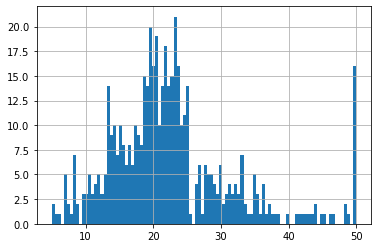

In [8]:
# 히스토그램 : hist()
df["CMEDV"].hist(bins=100)

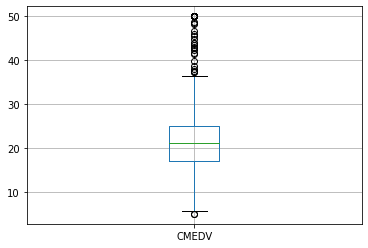

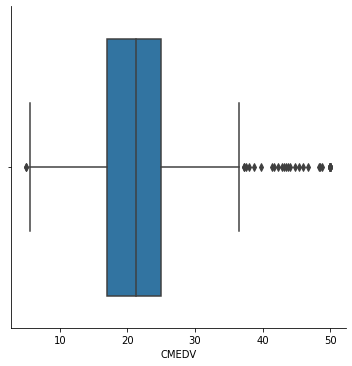

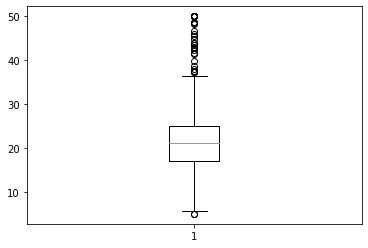

In [9]:
# boxplot : boxplot()
df.boxplot(column="CMEDV")
plt.show()

#seaborn
sns.catplot(data=df , x="CMEDV" , kind="box")
plt.show()

#matplotlib
plt.boxplot(df.CMEDV)
plt.show()

### 2.2 설명(독립) 변수 탐색

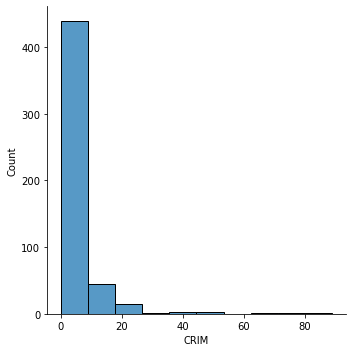

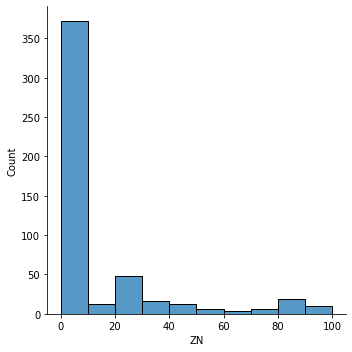

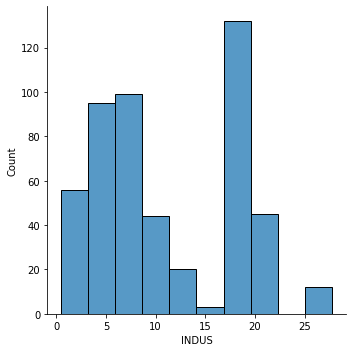

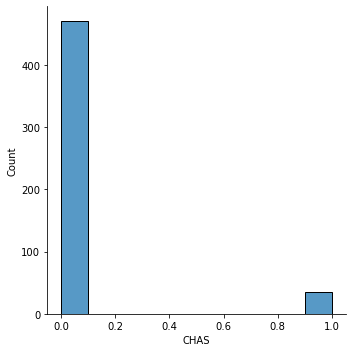

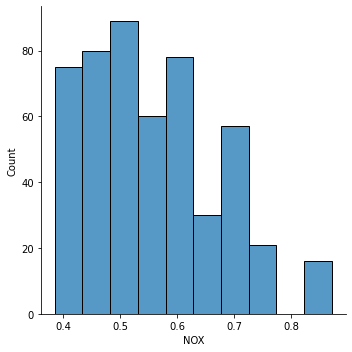

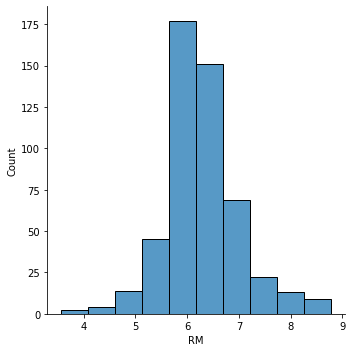

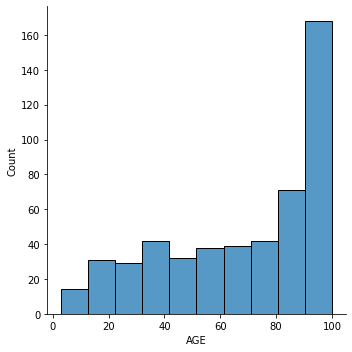

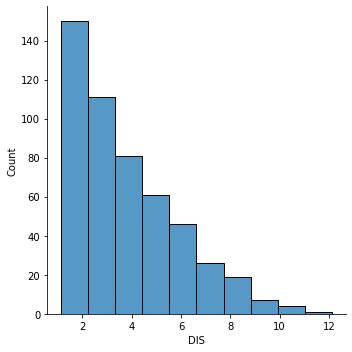

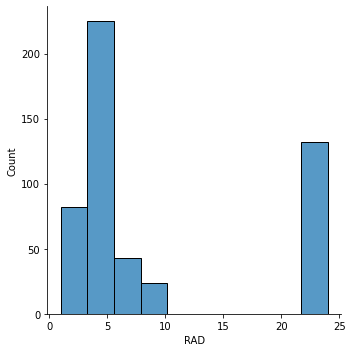

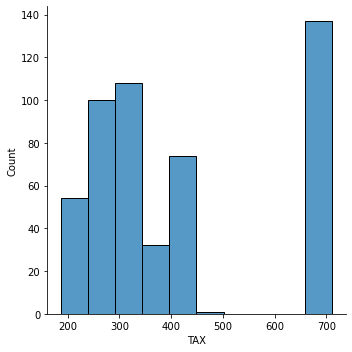

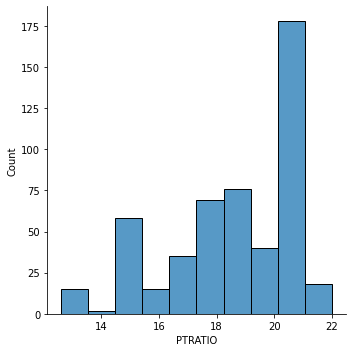

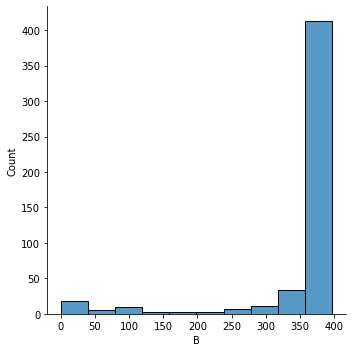

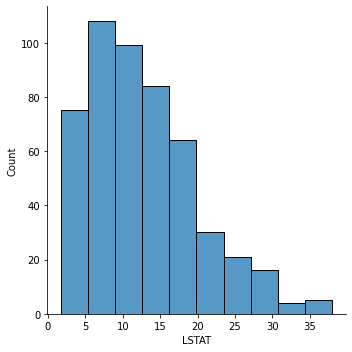

In [10]:
# 히스토그램 
x= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for xi in x:
    sns.displot(data = df , x=xi , bins=10)

### 2.3 설명변수와 목표변수 간 관계 분석

In [11]:
# 상관관계 분석 : Pearson 상관계수, corr()
cols = ['CMEDV','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
corr = df[cols].corr(method='pearson')
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


<function matplotlib.pyplot.show(close=None, block=None)>

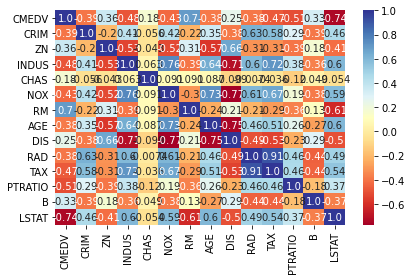

In [12]:
# 히트맵 표현 
hm = sns.heatmap(corr.values, annot = True , fmt ='.2' , xticklabels = cols , yticklabels =cols,
                cmap='RdYlBu' , 
                 #ax=plt.figure(figsize(10,10)),gca()
                )
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

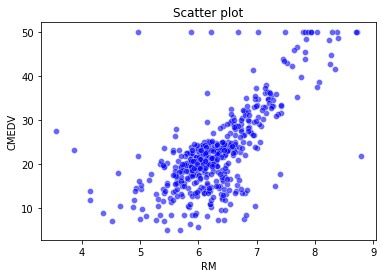

In [13]:
# CMDEV-RM 관계 분석 : scatter plot
sns.scatterplot (
    data=df , x='RM' , y='CMEDV' , marker ='o' , color = 'blue' , alpha = 0.6
)
plt.title('Scatter plot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

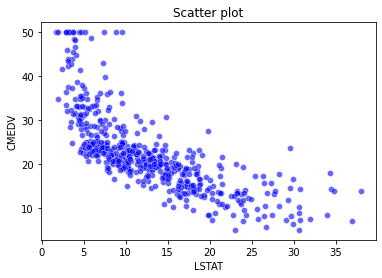

In [14]:
# CMDEV-LSTAT 관계 분석 : scatter plot
sns.scatterplot (
    data=df , x='LSTAT' , y='CMEDV' , marker ='o' , color = 'blue' , alpha = 0.6
)
plt.title('Scatter plot')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

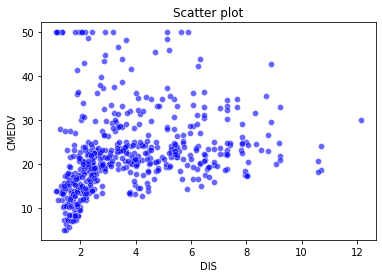

In [15]:
# 상관관계가 적은 변수들과의 분포 비교  예)DIS(고용센터와의 거리)는 0.25
sns.scatterplot (
    data=df , x='DIS' , y='CMEDV' , marker ='o' , color = 'blue' , alpha = 0.6
)
plt.title('Scatter plot')
plt.show

### 2.4 도시별 차이 분석

In [16]:
# 92개의 도시가 있었다. 각 도시별 빈도수를 확인한다.: value_counts
df.TOWN.value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Norwell               1
Medfield              1
Topsfield             1
Hull                  1
Hamilton              1
Name: TOWN, Length: 92, dtype: int64

<AxesSubplot:>

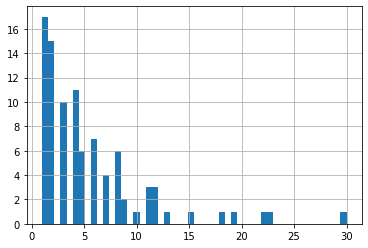

In [17]:
# 히스토그램
df.TOWN.value_counts().hist(bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

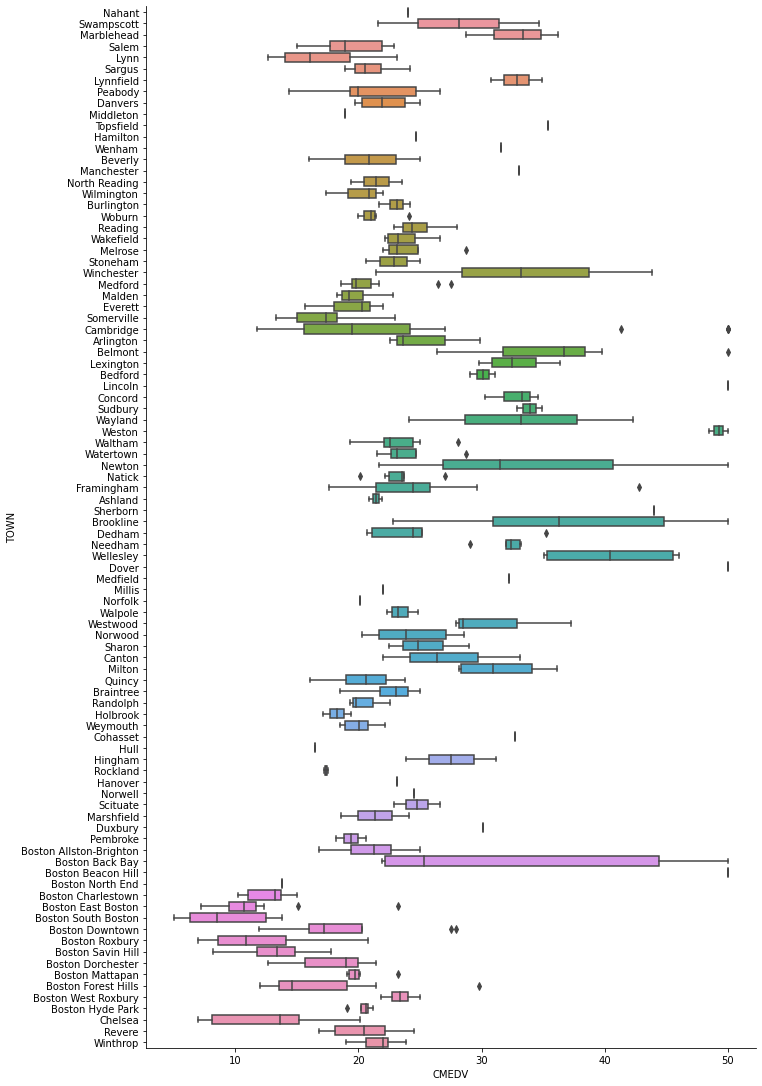

In [18]:
# 도시별 주택가격 특징 
sns.catplot(
    data=df , x='CMEDV' , y='TOWN' , kind = 'box',
    height=15 , aspect=0.7
)

# sns.boxplot(
#      data=df , x='CMEDV' , y='TOWN')
plt.show

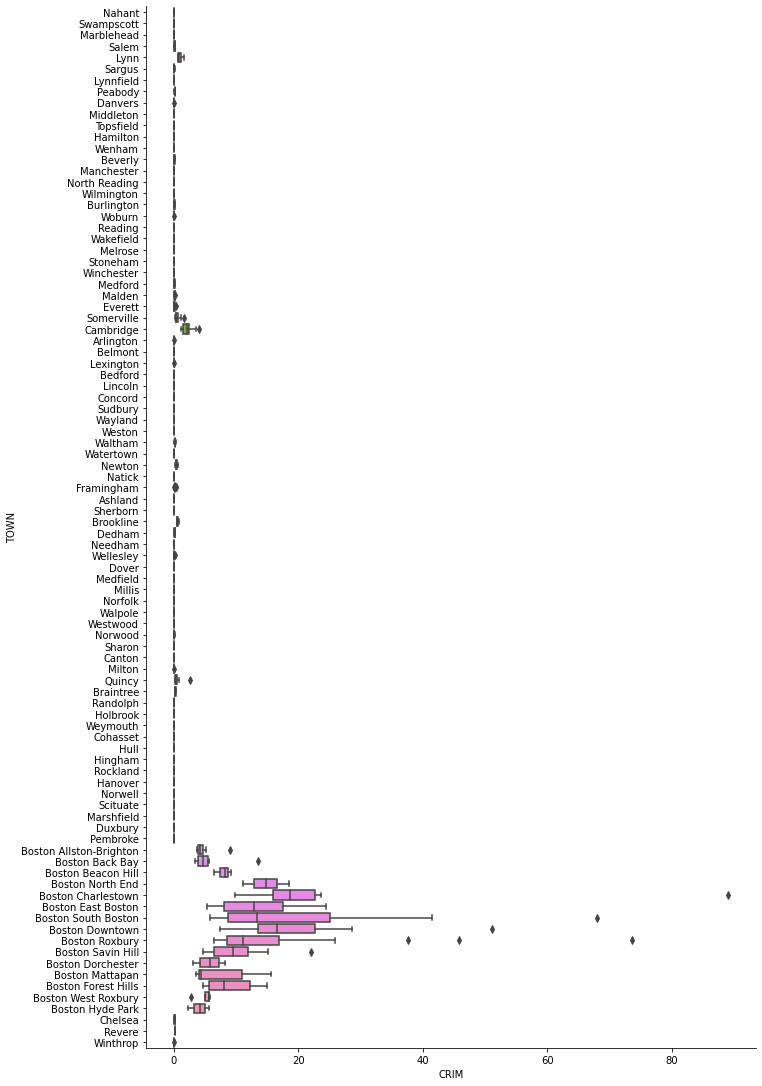

In [19]:
# 왜 보스턴 지역의 집값이 낮을까?  
sns.catplot(
    data=df , x='CRIM' , y='TOWN' , kind ='box' ,
    height=15 , aspect =0.7)

## 3. 집값 예측 모델링

### 3.1 정규화 
특징들 간 크기(scale) 차이로 인한 중요도 오분석을 막기위해 특징들 간 정규화 수행

In [20]:
# 데이터 스케일 확인
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [21]:
# CHAS 더미 데이터 확인 --> 이 데이터는 제외하고 사용
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [22]:
# sklearn 설치
!pip install scikit-learn 
# !pip install scipy

In [40]:
# 정규화
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler #N(0,1)의 정규분포
cols = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df[cols] = scaler.fit_transform(df[cols])

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [26]:
# 스케일링된 데이터 확인
df.head()

X= df[cols] #독립변수에 해당되는 것
y=df['CMEDV'] #종속변수에 해당되는 것

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

NameError: name 'train_test_split' is not defined

### 3.2 데이터셋 분할
Training set과 Test set으로 나눠 Training set은 모델을 만드는 과정에서 사용하고, Test set은 완성된 모델의 성능을 확인할 때 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']  # 더미 변수 제거
X = df[num_cols]
y = df['CMEDV']


In [ ]:
# 학습데이터 확인
X_train.shape, y_train.shape

### 3.3 다중공선성(Multicollinearity) 확인

다중공선성(多重共線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다.    
VIF (Variance Inflation Factors, 분산팽창요인)으로 다중공선성을 판단하며, VIF > 10 인 변수들은 다른 변수와 상관관계가 높아 다중공선성이 존재하는 것으로 판단한다. 

In [ ]:
# 통계모델 모듈 설치
!pip install statsmodels

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

NameError: name 'X_train' is not defined

### 3.4 회귀 모델링

선형회귀모델(Linear Regression Model)

In [ ]:
from sklearn import linear_model

# training set으로 선형회귀모델 생성


# test set으로 예측결과 확인


# 회귀모델 계수 확인


In [ ]:
# 모든 변수를 사용한 결과



### [비교] 변수를 줄여서 사용한 경우


In [ ]:
# 데이터셋 생성
num_cols = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE','PTRATIO', 'B', 'LSTAT']
X = df[num_cols]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape

In [ ]:
# 다중공선성 확인
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

In [ ]:
# 회귀 모델링 --> 복사해서 사용



In [ ]:
# 테스트 결과 : ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE','PTRATIO', 'B', 'LSTAT']  --> 복사해서 사용



#### 결과비교
1. 모든 변수를 사용한 경우
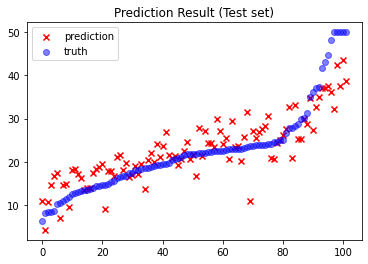
2. VIF > 4인 변수를 제거하고 사용한 경우
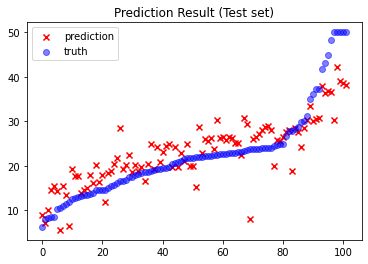

# 참고문헌
https://hyemin-kim.github.io/2020/08/11/E-Python-LinearRegression-1/